In [4]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import autosklearn.classification
import pandas as pd
import time

In [5]:
X_train = pd.read_csv('../../Data/Titanic/processed/x_train.csv')
y_train = pd.read_csv('../../Data/Titanic/processed/y_train.csv')
X_test = pd.read_csv('../../Data/Titanic/processed/x_test.csv')
y_test = pd.read_csv('../../Data/Titanic/processed/y_test.csv')

In [13]:
start = time.time()
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 5},
)

In [14]:
# fit() changes the data in place, but refit needs the original data. We
# therefore copy the data. In practice, one should reload the data
automl.fit(X_train.copy(), y_train.copy(), dataset_name='titanic')

/opt/conda/lib/python3.7/site-packages/autosklearn/automl.py:917: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Will change shape via np.ravel().
  y = self._check_y(y)


AutoSklearnClassifier(delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, ml_memory_limit=3072,
                      n_jobs=None, output_folder=None, per_run_time_limit=30,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5}, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=120, tmp_folder=

In [15]:
# During fit(), models are fit on individual cross-validation folds. To use
# all available data, we call refit() which trains all models in the
# final ensemble on the whole dataset.
automl.refit(X_train.copy(), y_train.copy())

elapsed_time=(time.time()-start)

/opt/conda/lib/python3.7/site-packages/autosklearn/automl.py:917: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Will change shape via np.ravel().
  y = self._check_y(y)


In [16]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))
print("elapsed time:",elapsed_time)

Accuracy score 0.8305084745762712
elapsed time: 135.5369107723236


In [17]:
y_test.describe()
print(y_test)

     Survived
0           1
1           0
2           1
3           0
4           1
..        ...
290         0
291         0
292         1
293         1
294         1

[295 rows x 1 columns]


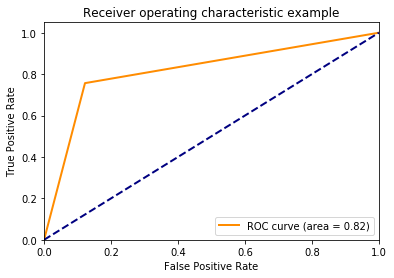

<Figure size 432x288 with 0 Axes>

In [21]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
plt.savefig("Auto_sklearn_Titanic_ROC.pdf")